In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, re

In [4]:
sns.set_style("whitegrid")
#plt.style.use("seaborn")
params = {#"ytick.color" : "black",
          #"xtick.color" : "black",
          #"axes.labelcolor" : "black",
          #"axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

## Dataset analysis

In [3]:
def len_in_words(text: str) -> int:
    return len(re.findall(r'\b\w+\b', text))

In [4]:
with open("../data/swisscom_dataset.json", "r") as f:
    swisscom_dataset = json.load(f)

In [5]:
swisscom_dataset_df = pd.DataFrame({
    "text" : [d["text"] for d in swisscom_dataset],
    "Type" : [d["metadata"]["type"] for d in swisscom_dataset]
})
swisscom_dataset_df["word_count"] = swisscom_dataset_df["text"].apply(lambda t:len_in_words(t))

In [6]:
swisscom_dataset_df.groupby(["Type"]).size()

Type
community     747
webpage      2723
dtype: int64

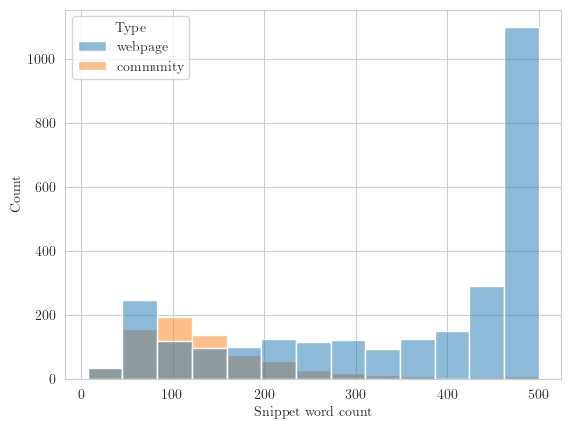

In [8]:
sns.histplot(data=swisscom_dataset_df, x="word_count", hue="Type")
plt.xlabel("Snippet word count")
plt.savefig("../figures/dataset_distribution.svg")

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'OpenAI ada'),
  Text(1, 0, 'OpenAI 3 small'),
  Text(2, 0, 'OpenAI 3 large'),
  Text(3, 0, 'Sentence-BERT'),
  Text(4, 0, 'bge-large v1.5'),
  Text(5, 0, 'UAE Large V1'),
  Text(6, 0, 'mxbai embed large'),
  Text(7, 0, 'Cohere embed light v3.0'),
  Text(8, 0, 'Cohere v3.0')])

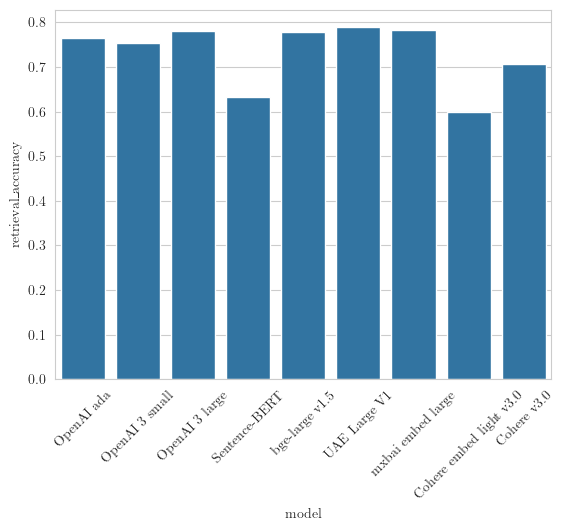

In [9]:
embedding_results = \
{'text-embedding-ada-002': 0.7657142857142857, 
 'text-embedding-3-small': 0.7542857142857143, 
 'text-embedding-3-large': 0.78, 
 'sentence-transformers/msmarco-bert-base-dot-v5': 0.6314285714285715,
 'BAAI/bge-large-en-v1.5': 0.7771428571428571, 
 'WhereIsAI/UAE-Large-V1': 0.7885714285714286, 
 'mixedbread-ai/mxbai-embed-large-v1': 0.7828571428571428, 
 'embed-english-light-v3.0': 0.6, 
 'embed-english-v3.0': 0.7057142857142857}

embedding_names = \
{'text-embedding-ada-002': "OpenAI ada", 
 'text-embedding-3-small': "OpenAI 3 small", 
 'text-embedding-3-large': "OpenAI 3 large", 
 'sentence-transformers/msmarco-bert-base-dot-v5': "Sentence-BERT",
 'BAAI/bge-large-en-v1.5': "bge-large v1.5", 
 'WhereIsAI/UAE-Large-V1': "UAE Large V1", 
 'mixedbread-ai/mxbai-embed-large-v1': "mxbai embed large", 
 'embed-english-light-v3.0': "Cohere embed light v3.0", 
 'embed-english-v3.0': "Cohere v3.0"}

embedding_results_df = pd.DataFrame({
    "model" : [embedding_names[m] for m in embedding_results.keys()],
    "retrieval_accuracy" : list(embedding_results.values())
})

ax = sns.barplot(embedding_results_df, x="model", y="retrieval_accuracy", errorbar=None)
plt.xticks(rotation=45)
#ax.bar_label(ax.containers[0], fontsize=10);
